In [2]:
%matplotlib inline
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [5]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


### What are the ten most common movie names of all time?

In [13]:
titles['title'].value_counts().head(10)

Hamlet                  19
Carmen                  15
Macbeth                 15
Maya                    11
The Outsider            11
Othello                 11
The Three Musketeers    11
Paradise                10
Anna                    10
The Promise             10
dtype: int64

### Which three years of the 1930s saw the most films released?

In [17]:
titles[(titles.year >= 1930) & (titles.year < 1940)].year.value_counts().head(3)

1937    1189
1936    1129
1938    1126
dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

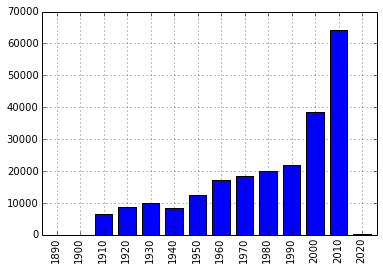

In [23]:
(titles.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" films made each decade.

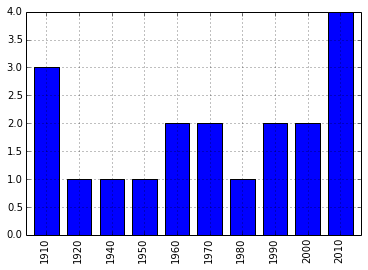

In [24]:
(titles[titles.title == 'Hamlet'].year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

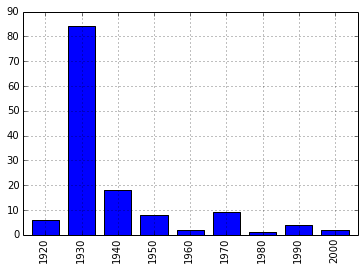

In [25]:
(cast[cast.character == 'Rustler'].year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" characters each decade.

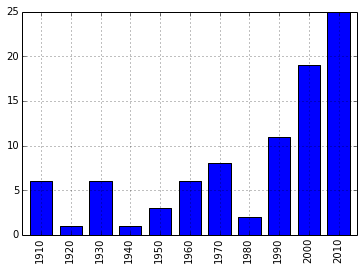

In [27]:
(cast[cast.character == 'Hamlet'].year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### What are the 11 most common character names in movie history?

In [29]:
cast.character.value_counts().head(11)

Himself        19227
Dancer         11739
Extra          10434
Reporter        7940
Doctor          7247
Student         6805
Policeman       6739
Party Guest     6518
Nurse           6474
Bartender       6418
Minor Role      6158
dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [30]:
cast[cast.character == "Herself"].name.value_counts().head(10)

Joyce Brothers         14
Queen Elizabeth II     11
Margaret Thatcher       7
Mary Jo Pehl            7
Joan Rivers             6
Hillary Clinton         5
Sally Jessy Raphael     5
Kareena Kapoor          5
Rekha                   5
Caroline Rhea           5
dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [31]:
cast[cast.character == "Himself"].name.value_counts().head(10)

Adolf Hitler             97
Richard Nixon            43
Ronald Reagan            34
John F. Kennedy          27
Ron Jeremy               24
George W. Bush           22
Winston Churchill        21
Benito Mussolini         21
Franklin D. Roosevelt    20
Bill Clinton             20
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [34]:
cast[(cast.year == 1945) & ((cast.type == 'actor') | (cast.type == 'actress'))].name.value_counts().head(10)

Emmett Vogan        39
Sam (II) Harris     31
Bess Flowers        29
Harold Miller       29
Nolan Leary         27
Frank O'Connor      26
Larry Steers        25
Franklyn Farnum     25
Charles Sullivan    24
Tom London          24
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [36]:
cast[(cast.year == 1985)].name.value_counts().head(10)

Mammootty         21
Sukumari          19
Shakti Kapoor     19
Lou Scheimer      15
Mohanlal          15
Raj Babbar        14
Aruna Irani       14
Deven Verma       13
Rajesh Khanna     13
Pinchoo Kapoor    12
dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

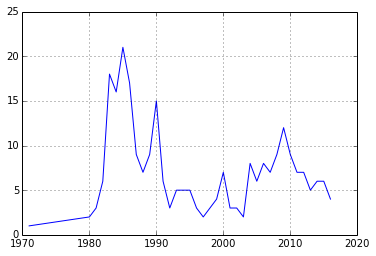

In [41]:
cast[cast.name == 'Mammootty'].year.value_counts().sort_index().plot()

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [43]:
cast[cast.character.str.startswith("Patron in")].character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in restaurant             3
Patron in Restaurant             3
Patron in cabaret                3
Patron in Club                   3
Patron in Quiet Bar              2
dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [44]:
cast[cast.character.str.startswith("Science")].character.value_counts().head(10)

Science Teacher         56
Science Fair Student     9
Science Student          9
Science Fair Judge       5
Science Promo Cadet      5
Science Club Member      5
Science Reporter         5
Science Kid              4
Science teacher          3
Science Fair Kid         3
dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

/Users/dhara/miniconda2/envs/env/lib/python2.7/site-packages/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


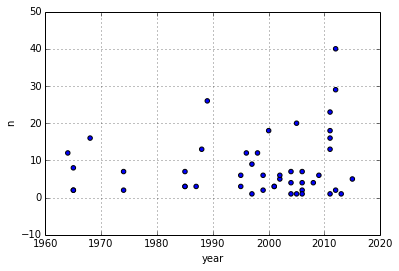

In [54]:
c = cast[cast.name == 'Judi Dench'].sort('year')[cast.n.notnull()].plot(x='year',y='n',kind='scatter')


### Plot the n-values of Cary Grant's roles through his career.

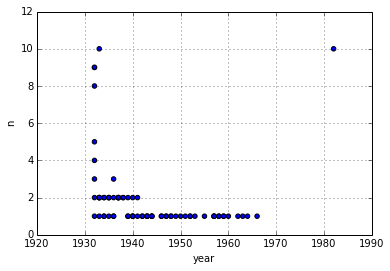

In [55]:
c = cast[cast.name == 'Cary Grant'].sort('year')[cast.n.notnull()].plot(x='year',y='n',kind='scatter')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

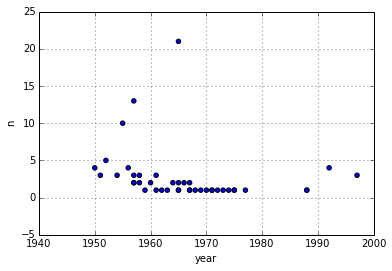

In [57]:
c = cast[cast.name == 'Sidney Poitier'].sort('year')[cast.n.notnull()].plot(x='year',y='n',kind='scatter')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [67]:
cast[(cast.n == 1) & (cast.year // 10 == 195)].type.value_counts()

actor      6541
actress    2916
dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [69]:
cast[(cast.n == 2) & (cast.year // 10 == 195)].type.value_counts()

actress    4509
actor      4497
dtype: int64